In [3]:
import pandas as pd
file_path = 'processed_data.csv'
data = pd.read_csv(file_path)


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DateTime           52416 non-null  object 
 1   nhiet_do           52416 non-null  float64
 2   do_am              52416 non-null  float64
 3   toc_do_gio         52416 non-null  float64
 4   dong_buc_xa_chung  52416 non-null  float64
 5   dong_buc_xa_tx     52416 non-null  float64
 6   khu1               52416 non-null  float64
 7   khu2               52416 non-null  float64
 8   khu3               52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [5]:
# Lấy 504 bản ghi cuối cùng cho tập kiểm tra
data_test = data.tail(1008)

# Lấy phần còn lại cho tập huấn luyện (train)
data_train = data.iloc[:-1008]  # Từ đầu đến bản ghi trước bản ghi thứ 504 cuối cùng

In [7]:
from sklearn.preprocessing import MinMaxScaler
dt_numeric = data_train.drop(columns=['DateTime'])
scaler = MinMaxScaler()
scaler.fit(dt_numeric)

MinMaxScaler()

In [9]:
df_scaled = pd.DataFrame(scaler.fit_transform(dt_numeric), columns=dt_numeric.columns)

In [11]:
X = df_scaled[['nhiet_do',	'do_am', 'toc_do_gio',	'dong_buc_xa_chung', 'dong_buc_xa_tx']]  # Các biến đầu vào
y = df_scaled[['khu1']]

In [13]:
dt_numeric1 = data_test.drop(columns=['DateTime'])

In [15]:
df_scaleds = pd.DataFrame(scaler.fit_transform(dt_numeric1), columns=dt_numeric1.columns)

In [17]:
Xx = df_scaleds[['nhiet_do',	'do_am', 'toc_do_gio',	'dong_buc_xa_chung', 'dong_buc_xa_tx']]  # Các biến đầu vào
yy = df_scaleds[['khu1']]

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

from tensorflow.keras.callbacks import EarlyStopping

# Xây dựng mô hình DNN
model_dnn = Sequential()

# Thêm lớp đầu vào (input layer) và lớp ẩn đầu tiên
model_dnn.add(Dense(128, input_dim=X.shape[1], activation='relu', kernel_regularizer=l2(0.0001)))

# Thêm các lớp ẩn
model_dnn.add(Dense(64, activation='relu'))
model_dnn.add(Dense(32, activation='relu'))
model_dnn.add(Dropout(0.5))
# Thêm lớp đầu ra (output layer)
model_dnn.add(Dense(1))  # Chỉ có một giá trị đầu ra là mức tiêu thụ điện

# Biên dịch mô hình
model_dnn.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error', metrics=['mae'])

# Huấn luyện mô hình
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model_dnn.fit(X, y, epochs=50, batch_size=32)

Epoch 1/50


D:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1607/1607 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.0543 - mae: 0.1794
Epoch 2/50
1607/1607 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0295 - mae: 0.1357
Epoch 3/50
1607/1607 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0275 - mae: 0.1318
Epoch 4/50
1607/1607 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0270 - mae: 0.1306
Epoch 5/50
1607/1607 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0267 - mae: 0.1294
Epoch 6/50
1607/1607 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0264 - mae: 0.1290
Epoch 7/50
1607/1607 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0262 - mae: 0.1286
Epoch 8/50
1607/1607 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0264 - mae: 0.1290
Epoch 9/50
1607/1607 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0261 - mae: 0.1281
Epoch 10/50
1607/1607 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0257 - mae: 0.1268
Epoch 11/50
1607/1607 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0257 - mae: 0.1269
Epoch 12/50
1607/1607 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0258 - mae: 0.1269
Epoch 13/50


In [21]:
model_dnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,413 (130.52 KB)

 Trainable params: 11,137 (43.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,276 (87.02 KB)

In [23]:
# Dự đoán mức tiêu thụ điện năng (Consumption) cho các dữ liệu đầu vào mới (X_test)
y_pred = model_dnn.predict(Xx)

# In ra kết quả dự đoán
len(y_pred)  # Hiển thị 10 giá trị dự đoán đầu tiên


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


1008

In [25]:
# Kiểm tra kết quả trên tập kiểm tra
loss, mae = model_dnn.evaluate(X, y)
print(f"Loss: {loss}, MAE: {mae}")

1607/1607 ━━━━━━━━━━━━━━━━━━━━ 1s 764us/step - loss: 0.0253 - mae: 0.1215
Loss: 0.023333264514803886, MAE: 0.11807381361722946


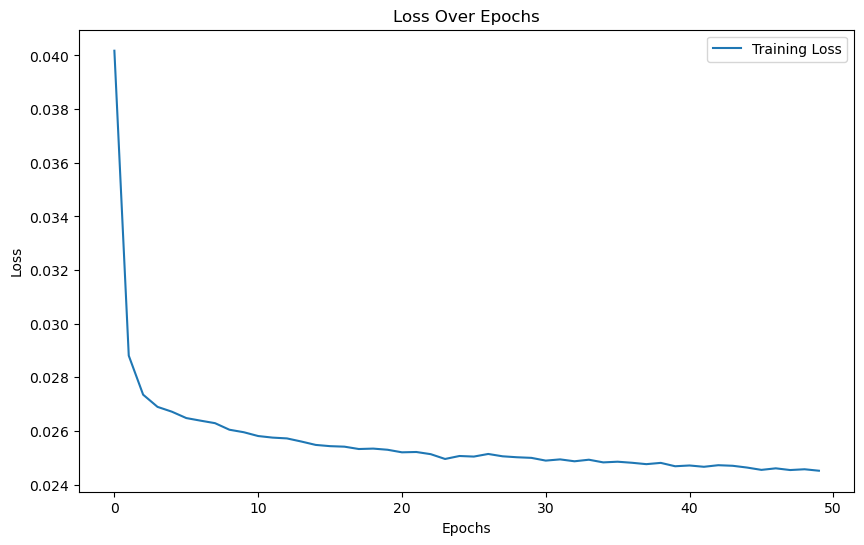

In [27]:
# Vẽ biểu đồ loss qua các epoch
loss_per_epoch = history.history['loss']
val_loss_per_epoch = history.history.get('val_loss', [])

plt.figure(figsize=(10,6))
plt.plot(range(len(loss_per_epoch)), loss_per_epoch, label='Training Loss')
if val_loss_per_epoch:
    plt.plot(range(len(val_loss_per_epoch)), val_loss_per_epoch, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()

In [29]:
# Dự đoán mức tiêu thụ điện năng trên tập kiểm tra
y_pred = model_dnn.predict(Xx)

# Chuyển đổi dự đoán và giá trị thực tế thành DataFrame để dễ so sánh

results = pd.DataFrame({'khu1': yy.values.flatten(), 'Predicted': y_pred.flatten()})
# Sắp xếp kết quả dự đoán theo giá trị thực tế (True)
results_sorted = results.sort_index()
results_sorted['datetime'] = data_test['DateTime'].values
results_sorted = results_sorted.set_index('datetime')
# Hiển thị kết quả đã sắp xếp
print(results_sorted)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
                      khu1  Predicted
datetime                             
12/24/2017 0:00   0.381348   0.303241
12/24/2017 0:10   0.358567   0.303447
12/24/2017 0:20   0.327954   0.305382
12/24/2017 0:30   0.303037   0.304494
12/24/2017 0:40   0.278832   0.305661
...                    ...        ...
12/30/2017 23:10  0.500237   0.261641
12/30/2017 23:20  0.471761   0.260219
12/30/2017 23:30  0.439013   0.259468
12/30/2017 23:40  0.414333   0.255011
12/30/2017 23:50  0.390603   0.249675

[1008 rows x 2 columns]


<Axes: xlabel='datetime'>

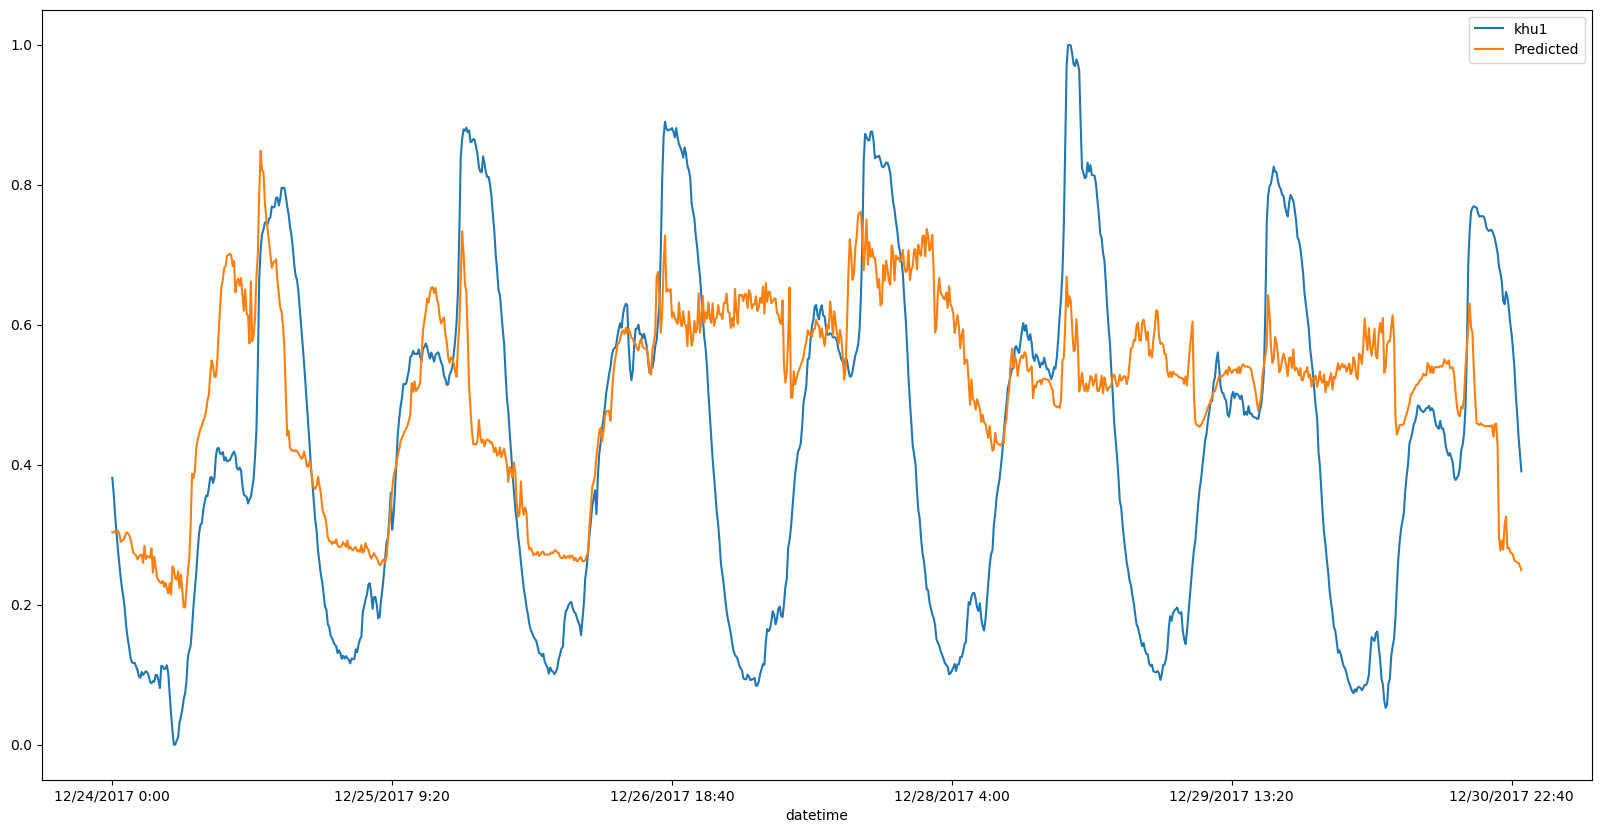

In [31]:
results_sorted.plot(figsize=(20,10))